# A signal bank

The `SignalBank` class encapsulates the signal generation code and yields a dictionary with a number of signals. In order to access those signals, the keys of this dictionary are called `signal_id`. The constructor simply takes the number `N` of samples of the desired signals.

The generation ensure that the begining and end of the signal are separated `np.sqrt(N)` from the borders of the TF plane (using a rounded spectrogram, i.e. with an analysis windows whose time and frequency dispersion are the same).

In [1]:
import numpy as np
from numpy import pi as pi
from matplotlib import pyplot as plt
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank

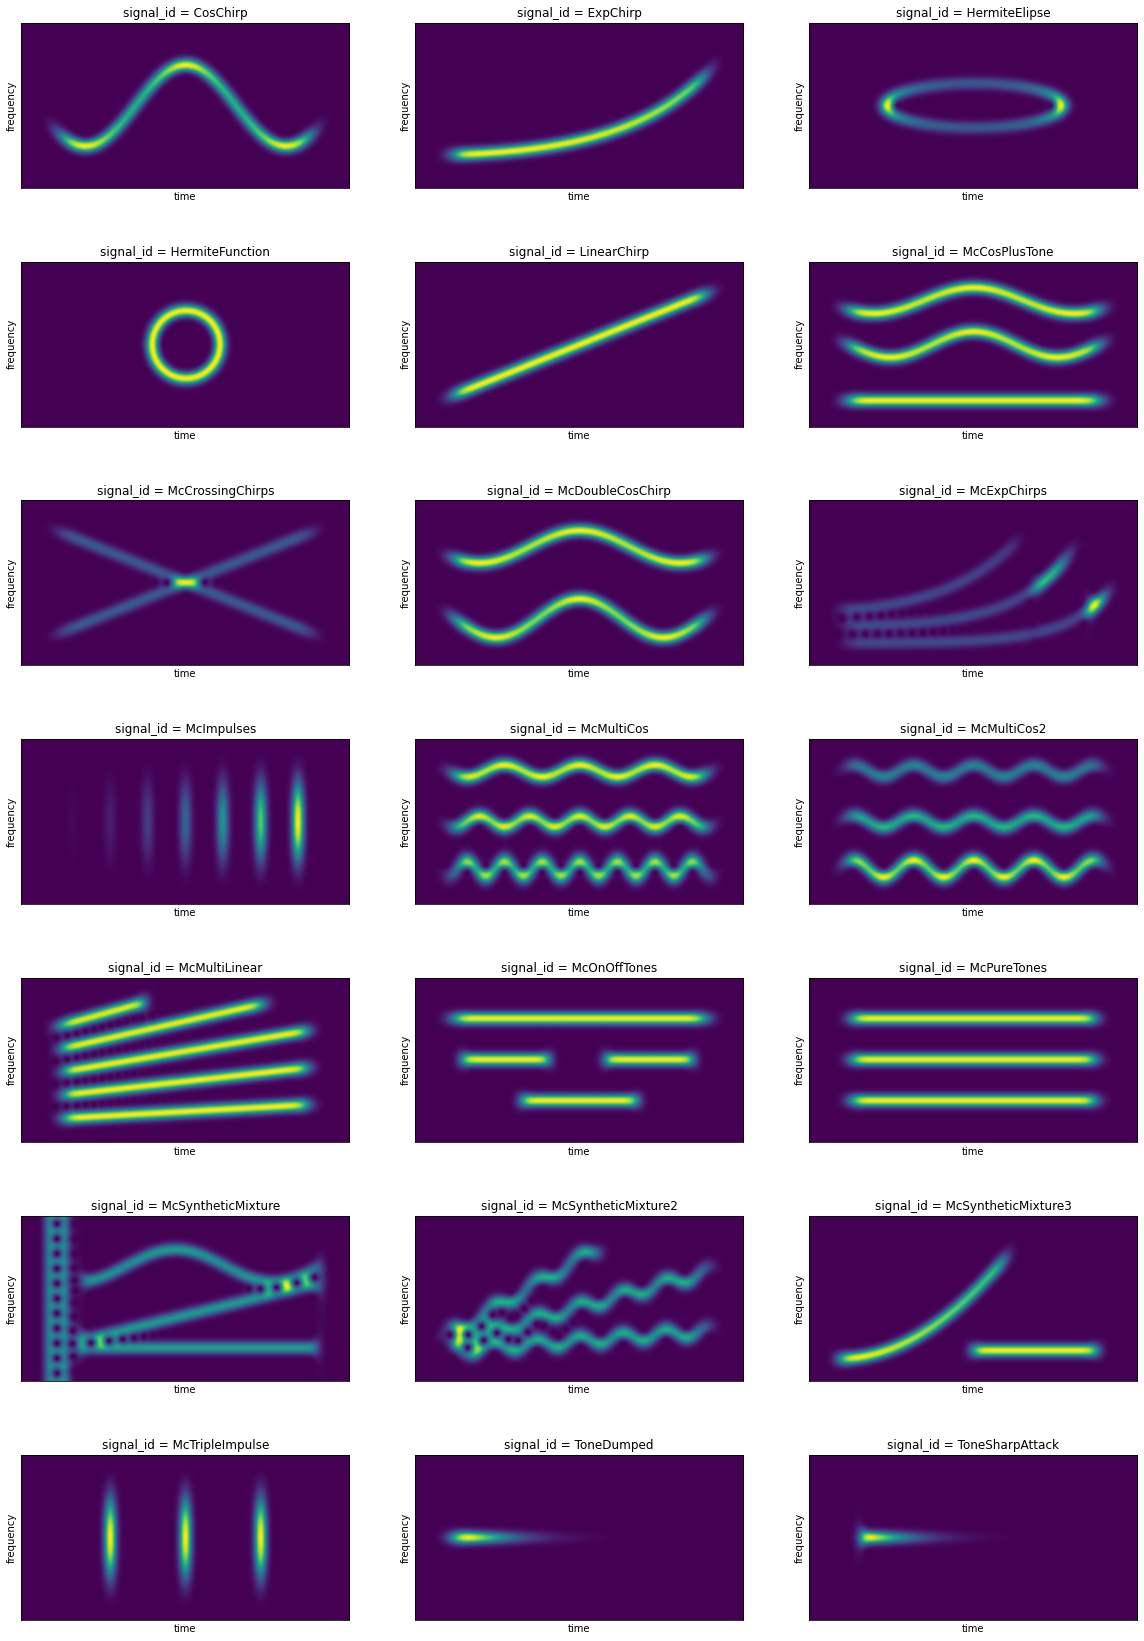

In [2]:
signal_bank = SignalBank(N = 512)
signals_dic = signal_bank.signalDict
number_of_signals = len(signals_dic.keys())
# nplots = int(np.ceil(np.sqrt(number_of_signals)))
# print(nplots)
fig, ax = plt.subplots(7, 3, figsize = (20,30))

for i,signal_id in enumerate(signals_dic):
    signal = signals_dic[signal_id]()
    S, _, _, _ = get_spectrogram(signal)
    idx = np.unravel_index(i, ax.shape)
    # print(idx)
    ax[idx].imshow(S, origin = 'lower')
    ax[idx].set_title('signal_id = '+ signal_id)
    ax[idx].set_xticks([],[])
    ax[idx].set_xlabel('time')
    ax[idx].set_yticks([])
    ax[idx].set_ylabel('frequency')

### Signals used in the public test-bench for denoising methods.

The signals used in this emulate different scenarios that could pose troubles for different methods.

1. Single-component signals: ```LinearChirp```, ```CosChirp```, ```McPureTones```
2. Crossing-component signals: ```McCrossingChirps```
3. Multi-component harmonic signals: ```McHarmonic```, ```McPureTones```
4. Multi-component Non-harmonic: ```McModulatedTones```, ```McDoubleCosChirp```, ```McSyntheticMixture```
5. Hermite type signals: ```HermiteFunction```, ```HermiteElipse```
6. Dumped and sharp attacks: ```ToneDumped```, ```ToneSharpAttack```
7. Multi-component signal with modes that start and die in different times: ```McOnOffTones```, ```McSyntheticMixture2``` and ```McHarmonic```.

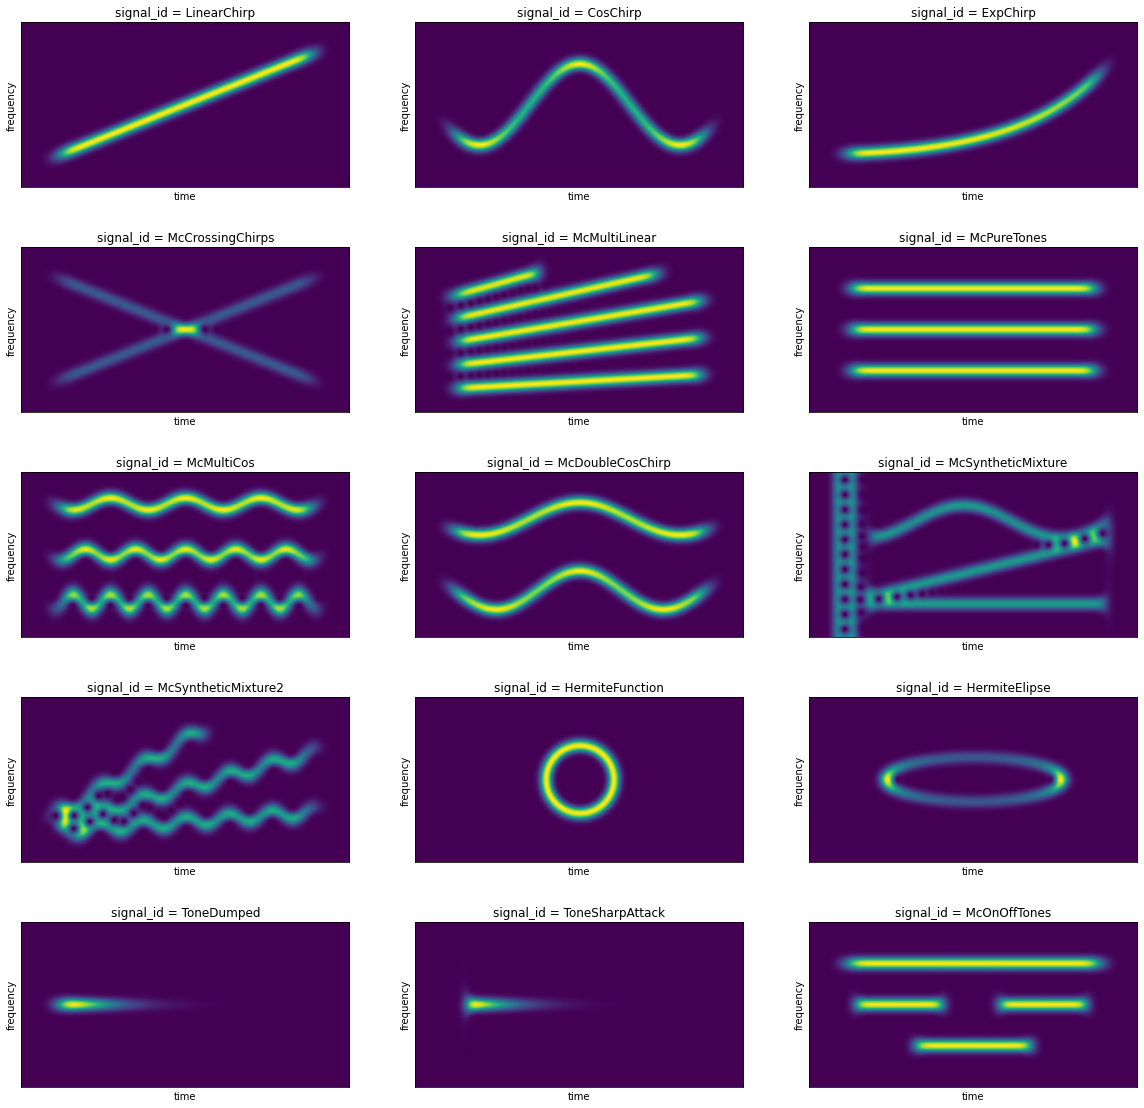

In [3]:
signal_names = ['LinearChirp', 'CosChirp', 'ExpChirp', # Single-component signals
                'McCrossingChirps',                       # Crossing-components  
                'McMultiLinear','McPureTones',               # Multi-Component Harmonic signals  
                'McMultiCos','McDoubleCosChirp',    # Multi-Component Non-Harmonic  
                'McSyntheticMixture','McSyntheticMixture2',
                'HermiteFunction','HermiteElipse',        # Hermite type signals  
                'ToneDumped','ToneSharpAttack',           # Dumped and Sharps attacks  
                'McOnOffTones']                           # Modes that born and die


fig, ax = plt.subplots(5, 3, figsize = (20,20))

for i,signal_id in enumerate(signal_names):
    signal = signals_dic[signal_id]()
    S, _, _, _ = get_spectrogram(signal)
    idx = np.unravel_index(i, ax.shape)
    # print(idx)
    ax[idx].imshow(S, origin = 'lower')
    ax[idx].set_title('signal_id = '+ signal_id)
    ax[idx].set_xticks([],[])
    ax[idx].set_xlabel('time')
    ax[idx].set_yticks([])
    ax[idx].set_ylabel('frequency')                

## Controlling the signal's effective length inside the observation window

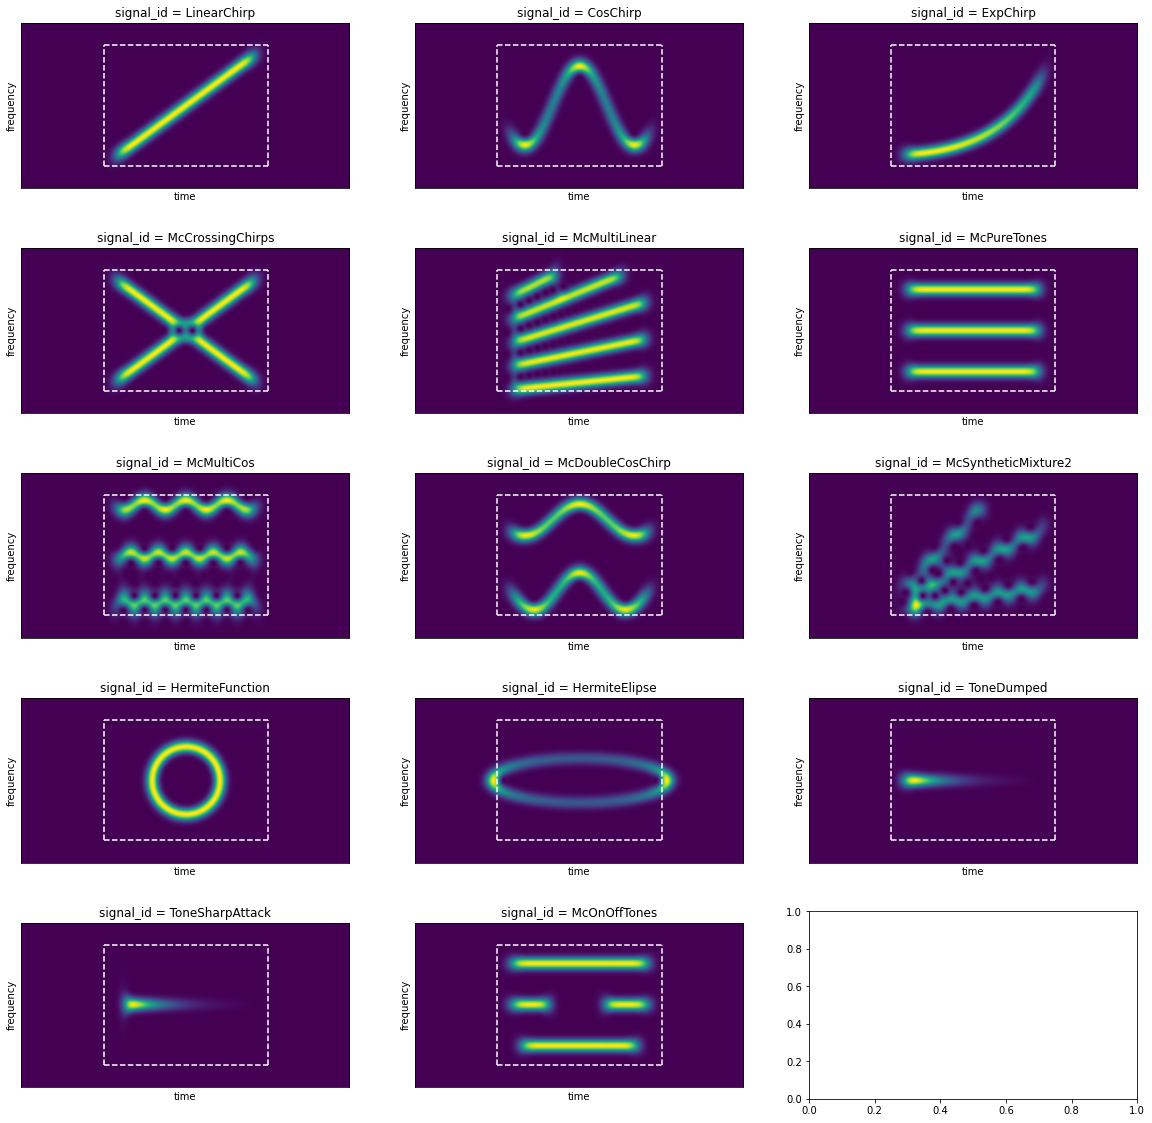

In [4]:
N = 512
signal_bank = SignalBank(N = N, Nsub=256)
signals_dic = signal_bank.signalDict
fmin = signal_bank.fmin
fmax = signal_bank.fmax
tmin = signal_bank.tmin
tmax = signal_bank.tmax
Nfft = N

signal_names = ['LinearChirp', 'CosChirp', 'ExpChirp', # Single-component signals
                'McCrossingChirps',                       # Crossing-components  
                'McMultiLinear','McPureTones',               # Multi-Component Harmonic signals  
                'McMultiCos','McDoubleCosChirp',    # Multi-Component Non-Harmonic  
                'McSyntheticMixture2',
                'HermiteFunction','HermiteElipse',        # Hermite type signals  
                'ToneDumped','ToneSharpAttack',           # Dumped and Sharps attacks  
                'McOnOffTones']                           # Modes that born and die

fig, ax = plt.subplots(5, 3, figsize = (20,20))

for i,signal_id in enumerate(signal_names):
    signal = signals_dic[signal_id]()
    S, _, _, _ = get_spectrogram(signal)
    idx = np.unravel_index(i, ax.shape)
    # print(idx)
    ax[idx].imshow(S, origin = 'lower')
    ax[idx].set_title('signal_id = '+ signal_id)
    ax[idx].set_xticks([],[])
    ax[idx].set_xlabel('time')
    ax[idx].set_yticks([])
    ax[idx].set_ylabel('frequency')
    ax[idx].plot([tmin, tmin],[fmin*Nfft, fmax*Nfft],'--w')
    ax[idx].plot([tmax, tmax],[fmin*Nfft, fmax*Nfft],'--w')
    ax[idx].plot([tmin, tmax],[fmin*Nfft, fmin*Nfft],'--w')
    ax[idx].plot([tmin, tmax],[fmax*Nfft, fmax*Nfft],'--w')                